# Distributions <a name='distributions'></a>
---

## Overview

In this notebook, we'll visualize some variable distributions from the [Lichess puzzle database](https://database.lichess.org/#puzzles).

## Contents

1. [Import the required packages and load the data](#import)
2. [Distribution of puzzle ratings](#rating)
3. [Distribution of rating deviations](#rating-deviation)
4. [Distribution of popularity](#popularity)
5. [Distribution of number of plays](#plays)
6. [Distribution of puzzle length](#length)
7. [Distribution of puzzle themes](#theme)
8. [Distribution of openings](#opening)


# Import the required packages and load the data <a name='import'></a>
---

## Packages

We'll use the following packages.
- [`pandas`](https://pandas.pydata.org/docs/) for processing the data.
- [`rpy2`](https://rpy2.github.io/doc/v3.0.x/html/index.html) for its [`ggplot2`](https://rpy2.github.io/doc/v3.0.x/html/graphics.html#package-ggplot2) visualizations.

In [ ]:
import pandas as pd

!pip install rpy2==3.5.1 #Newer versions of rpy2 were causing issues.

#Activate R magic
%reload_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318074 sha256=50ec10df4c3afdcdf3bfc0dfd735c070cd843da6b2d768f1b2062ca735816230
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


The cell below uses `%%R` to run some `R` code that installs and loads the `tidyverse` and `reshape2` packages needed to create our visualizations with `ggplot2`.

In [ ]:
%%R
install.packages("tidyverse")
install.packages("reshape2")

library("tidyverse")
library("reshape2")


(as ‘lib’ is unspecified)


































	‘/tmp/RtmplolIUh/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/RtmplolIUh/downloaded_packages’


✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’



    smiths




## Load the data

Now let's load the `lichess_db_puzzles_clean.csv` from our data collection and processing efforts in `puzzle_journey_data_collection_processing.ipynb`.

In [ ]:
puzzles_df = pd.read_csv('lichess_db_puzzle_clean.csv')

puzzles_df.head()

,Puzzle_ID,FEN,Moves,Rating,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,74,95,3136,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,5
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1518,75,96,19577,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,3
2,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,3
3,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,5
4,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1520,75,100,169,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,3


Now, transfer this dataframe to the `R` namespace. Note that using `%Rpush` caused the runtime to crash.

In [ ]:
%R puzzles_dfr <- read.csv('lichess_db_puzzle_clean.csv')

,Puzzle_ID,FEN,Moves,Rating,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length
1,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,74,95,3136,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,,5
2,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1518,75,96,19577,advantage endgame short,https://lichess.org/F8M8OS71#53,,3
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,3
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,,5
5,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1520,75,100,169,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,,3
...,...,...,...,...,...,...,...,...,...,...,...
3157076,zzzYp,3r1rk1/3pN1pp/nq3pn1/1pp1p1QN/4P3/5P2/2P3PP/3R...,g8h8 e7g6 h7g6 g5g6,1058,77,89,590,crushing kingsideAttack middlegame short,https://lichess.org/Yc8Fdtc0/black#52,,3
3157077,zzzc4,3r3k/p5pp/8/5R2/1BQ1p3/P3q3/Bb4PP/6K1 w - - 0 28,g1f1 d8d1 b4e1 e3e1,1022,75,89,364,mate mateIn2 middlegame short,https://lichess.org/jRTmvh6y#55,,3
3157078,zzzco,5Q2/pp3R1P/1kpp4/4p3/2P1P3/3PP2P/Pr2q3/2K5 w -...,f7f2 b2c2 c1b1 e2d1,1711,75,88,1076,endgame mate mateIn2 queensideAttack short,https://lichess.org/hZWTYIAT#69,,3
3157079,zzzhI,r3kb1r/ppp2ppp/2n5/3q3b/3P1B2/5N1P/PPP3P1/RN1Q...,c6d4 f1e1 e8d8 b1c3 d4f3 g2f3,2492,88,82,62,advantage long opening,https://lichess.org/N092KH4f/black#20,Kings_Gambit_Accepted Kings_Gambit_Accepted_Ab...,5


# Distribution of puzzle ratings<a name='rating'></a>

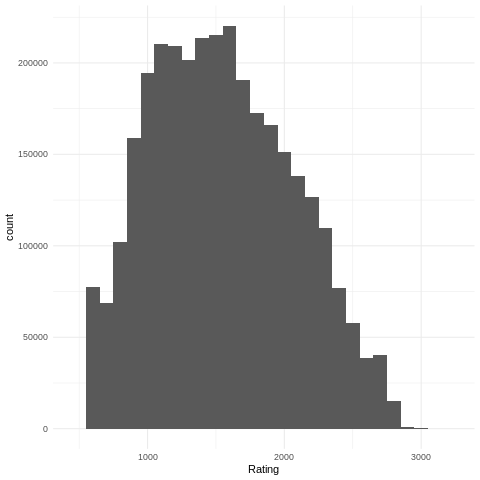

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Rating))+
  geom_histogram(binwidth = 100)+
  theme_minimal()

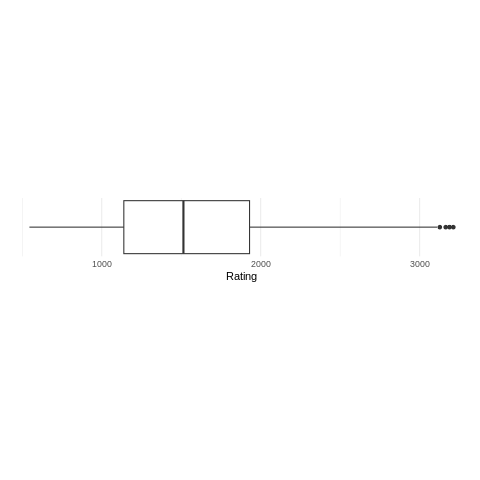

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Rating))+
  geom_boxplot()+
  theme_minimal()+
  theme(aspect.ratio = 1/8, 
        axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())

Puzzle ratings are unimodal and fairly symmetric.

# Distribution of rating deviations<a name='rating-deviation'></a>

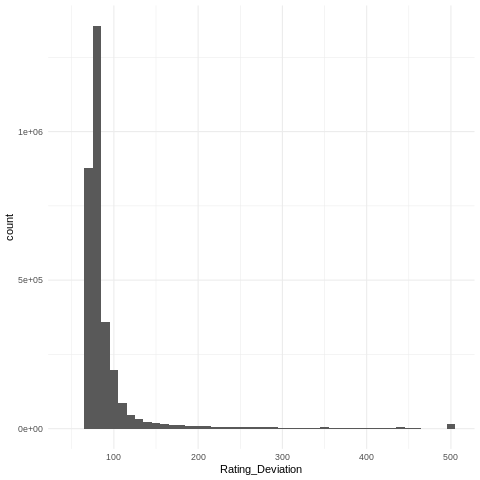

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Rating_Deviation))+
  geom_histogram(binwidth = 10)+
  theme_minimal()

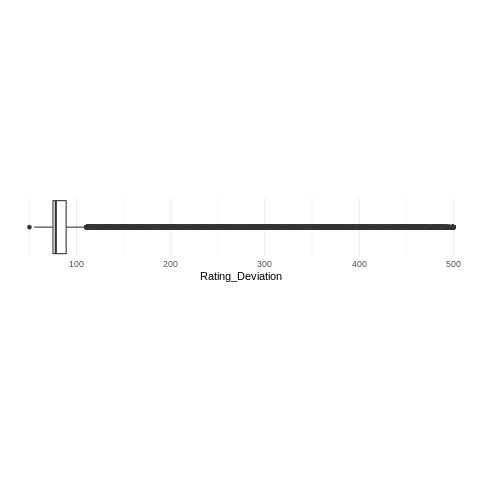

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Rating_Deviation))+
  geom_boxplot()+
  theme_minimal()+
  theme(aspect.ratio = 1/8, 
        axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())

The distribution of `Rating_Deviation` is right-skewed. Most puzzles have a rating deviation of less than `100`.

# Distribution of popularity<a name='popularity'></a>

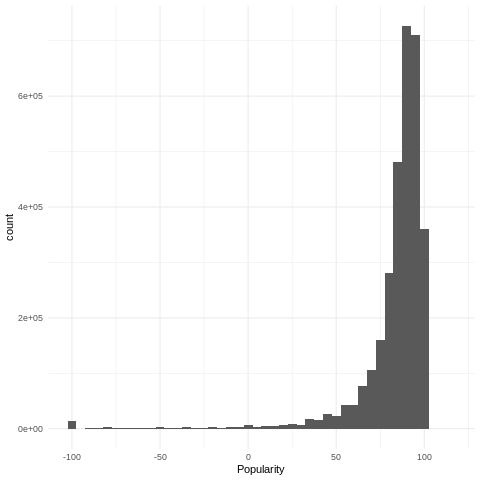

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Popularity))+
  geom_histogram(binwidth = 5)+
  theme_minimal()

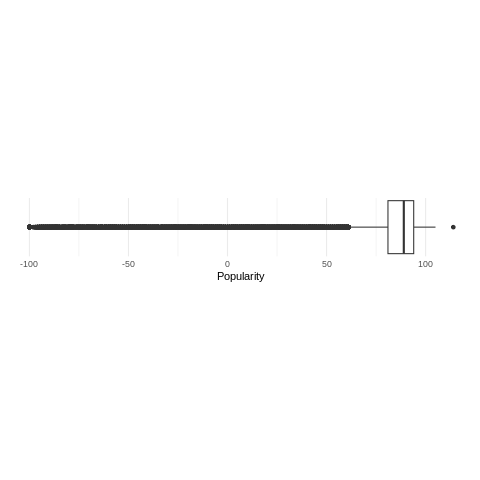

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Popularity))+
  geom_boxplot()+
  theme_minimal()+
  theme(aspect.ratio = 1/8, 
        axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())

The distribution of `Popularity` is left-skewed. Most puzzles are fairly popular, suggesting that puzzles tend to perform in the way that users expect (i.e. there are few puzzles perceived to be "bad" or "unfair").

# Distribution of number of plays<a name='plays'></a>

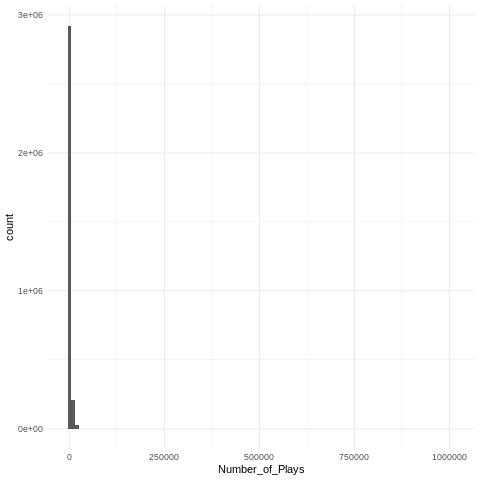

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Number_of_Plays))+
  geom_histogram(binwidth = 10000)+
  theme_minimal()

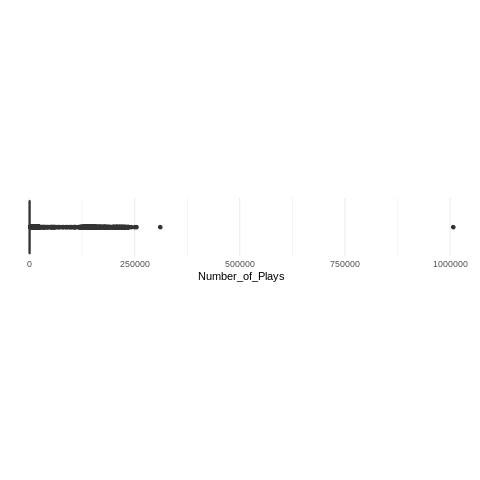

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Number_of_Plays))+
  geom_boxplot()+
  theme_minimal()+
  theme(aspect.ratio = 1/8, 
        axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())

The distribution of `Number_of_Plays` is right-skewed. There are not many puzzles with more than `2,000` plays, but there is one puzzle with over one million plays.

# Distribution of puzzle length<a name='length'></a>

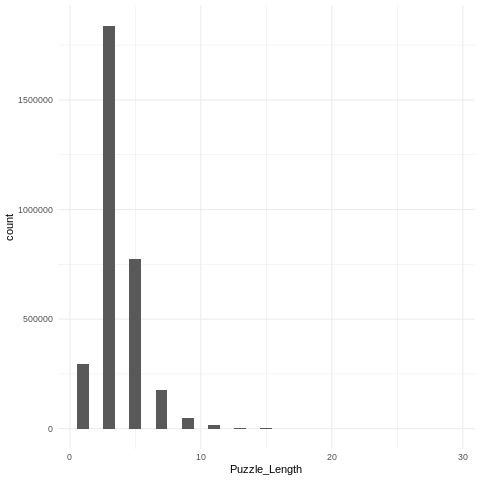

In [ ]:
%%R 
ggplot(puzzles_dfr, aes(x = Puzzle_Length))+
  geom_bar(aes(group = cut_width(Puzzle_Length, 1)))+
  theme_minimal()

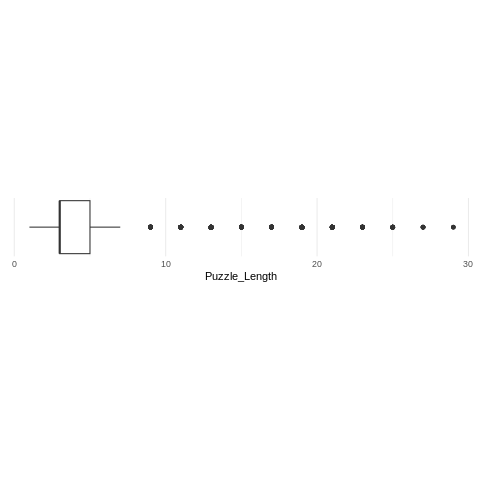

In [ ]:
%%R
ggplot(puzzles_dfr, aes(x = Puzzle_Length))+
  geom_boxplot()+
  theme_minimal()+
  theme(aspect.ratio = 1/8, 
        axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())

Puzzle lengths range from 1 move to 29 moves, though the distribution is right-skewed. The most frequently occuring puzzle length is `3`. 

# Distribution of puzzle themes<a name='theme'></a>


In the `Themes` column is a space-separated string describing the sort of tactic(s) in a particular puzzle. These are refined by users after completing a puzzle. The list of puzzle themes is available [here](https://github.com/lichess-org/lila/blob/master/translation/source/puzzleTheme.xml). Below, we put these themes into a `Python` list.



In [ ]:
theme_categories = ['advancedPawn', 'advantage', 'anastasiaMate', 'arabianMate', 'attackingF2F7',
                    'attraction', 'backRankMate', 'bishopEndgame', 'bodenMate', 'castling',
                    'capturingDefender', 'crushing', 'doubleBishopMate', 'dovetailMate', 'equality',
                    'kingsideAttack', 'clearance', 'defensiveMove', 'deflection', 'discoveredAttack',
                    'doubleCheck', 'endgame', 'enPassant', 'exposedKing', 'fork',
                    'hangingPiece', 'hookMate', 'interference', 'intermezzo', 'knightEndgame', 
                    'long', 'master', 'masterVsMaster', 'mate', 'mateIn1', 
                    'mateIn2', 'mateIn3', 'mateIn4', 'mateIn5', 'middlegame',
                    'oneMove', 'opening', 'pawnEndgame', 'pin', 'promotion',
                    'queenEndgame', 'queenRookEndgame', 'queensideAttack', 'quietMove', 'rookEndgame',
                    'sacrifice', 'short', 'skewer', 'smotheredMate', 'superGM', 
                    'trappedPiece', 'underPromotion', 'veryLong', 'xRayAttack', 'zugzwang',
                    'healthyMix', 'playerGames']

Note, there are `62` distinct themes.

In [ ]:
len(theme_categories)

62

To visualize the distribution of puzzle themes, we first take each entry in `Theme` and split it into a `Python` list of the themes. The variable `theme_lists` is actually a `Pandas` series, with each entry corresponding to a list of themes for a given puzzle.

In [ ]:
theme_lists = puzzles_df['Themes'].map(lambda x: x.split())
theme_lists.head()

0    [crushing, hangingPiece, long, middlegame]
1                   [advantage, endgame, short]
2                [advantage, middlegame, short]
3        [crushing, endgame, long, pawnEndgame]
4               [endgame, mate, mateIn2, short]
Name: Themes, dtype: object

Next, we flatten the series `theme_lists` into a single list called `themes_flat`. This is a `Python` list containing every theme occuring in the puzzles database, ordered (but not grouped) by `Puzzle_ID`. 

In [ ]:
themes_flat = []
for theme_list in theme_lists:
  for theme in theme_list:
    themes_flat.append(theme)

themes_flat[0:7]

['crushing',
 'hangingPiece',
 'long',
 'middlegame',
 'advantage',
 'endgame',
 'short']

Finally, we convert the flattened list of themes to a dataframe with a single column labelled `theme`.

In [ ]:
themes_df = pd.DataFrame(themes_flat, columns = ['theme'])
themes_df.head()

,theme
0,crushing
1,hangingPiece
2,long
3,middlegame
4,advantage


Now, pass this dataframe to the `R` namespace.

In [ ]:
%Rpush themes_df

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


When making the bar chart displaying the frequency of each theme's occurence in `themes_df`, we use `mutate()` to reorder the entries in descending order of frequency.

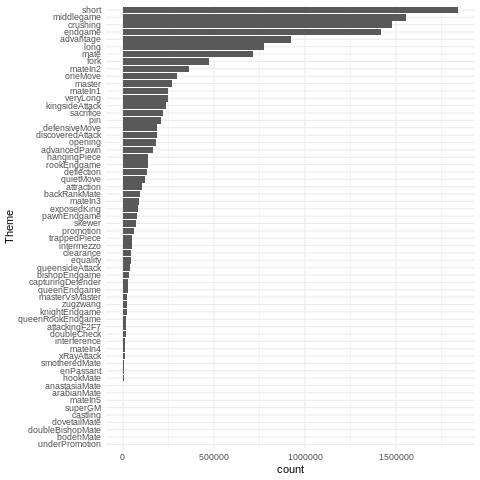

In [ ]:
%%R
ggplot(mutate(themes_df, theme = fct_reorder(theme, theme, .fun = 'length')), aes(y = theme))+ 
  labs(y = "Theme")+
  geom_bar()+
  theme_minimal()

Observe the large variety of themes. The most common puzzle theme is `short`, followed by `middlegame`, `crushing`, and `endgame`. 

# Distribution of openings<a name='opening'></a>

We'll look at the first level of the `Opening_Tags` column. The first line in the code below drops missing values from the `Opening_Tags` column in `puzzles_df`, extracts the first item from the space-seperated list describing the opening (which characterizes the primary opening, but does not identify any deeper variations), and creates a series `openings` that contains the first-level opening tag occuring in each puzzle. The subsequent lines convert this series into a dataframe and previews the first 5 rows.

In [ ]:
openings = puzzles_df['Opening_Tags'].dropna().map(lambda x: x.split()[0])
openings_df = pd.DataFrame(openings, columns = ['Opening_Tags'])
openings_df.head()

,Opening_Tags
2,Kings_Pawn_Game
5,Benoni_Defense
6,Horwitz_Defense
10,Scotch_Game
14,Sicilian_Defense


Pass `openings_df` to the `R` namespace.

In [ ]:
%Rpush openings_df

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


Once again, we use `mutate()` to reorder the openings in descending order of frequency.

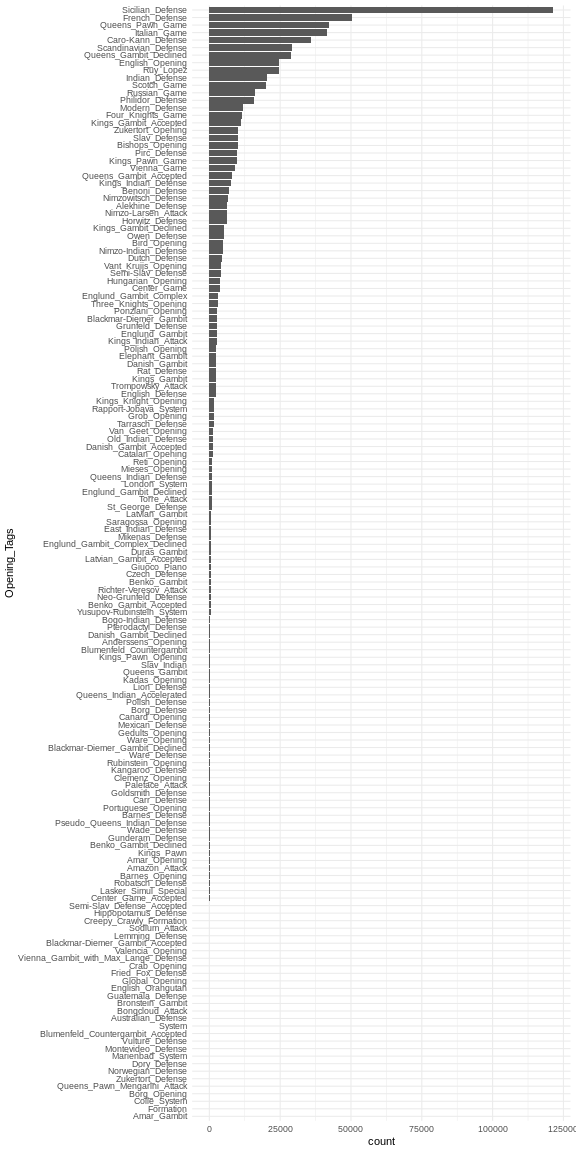

In [ ]:
%%R -h 16 -w 8 -u in
ggplot(mutate(openings_df, Opening_Tags = fct_reorder(Opening_Tags, Opening_Tags, .fun = 'length')), aes(y = Opening_Tags))+
  geom_bar()+
  theme_minimal()

Note the variety in opening tags—including any deeper variations would likely become unwieldy here. The most common opening is the `Sicilian_Defense`.